In [2]:
import geopandas as gpd

In [3]:
df = gpd.read_parquet("example_data/nyc_bike_trips.parquet")
df

,h3,morning_starts,morning_ends,afternoon_starts,afternoon_ends,geometry
0,617733120577503231,58,15,24,38,"POLYGON ((-73.88768 40.876, -73.88979 40.87506..."
1,617733120577765375,18,5,32,50,"POLYGON ((-73.88543 40.87341, -73.88755 40.872..."
2,617733120578027519,8,26,24,21,"POLYGON ((-73.89196 40.87589, -73.89407 40.874..."
3,617733120578289663,129,61,103,108,"POLYGON ((-73.88972 40.8733, -73.89183 40.8723..."
4,617733120578551807,50,14,72,80,"POLYGON ((-73.88563 40.8787, -73.88774 40.8777..."
...,...,...,...,...,...,...
1496,617733152329433087,86,88,73,59,"POLYGON ((-74.00425 40.67719, -74.00635 40.676..."
1497,617733152329695231,70,94,147,88,"POLYGON ((-74.00201 40.67461, -74.00411 40.673..."
1498,617733152329957375,51,49,38,45,"POLYGON ((-74.00852 40.67707, -74.01062 40.676..."
1499,617733152333627391,144,132,206,197,"POLYGON ((-74.01503 40.67954, -74.01713 40.678..."


/tmp/ipykernel_4868/2556680235.py:29: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


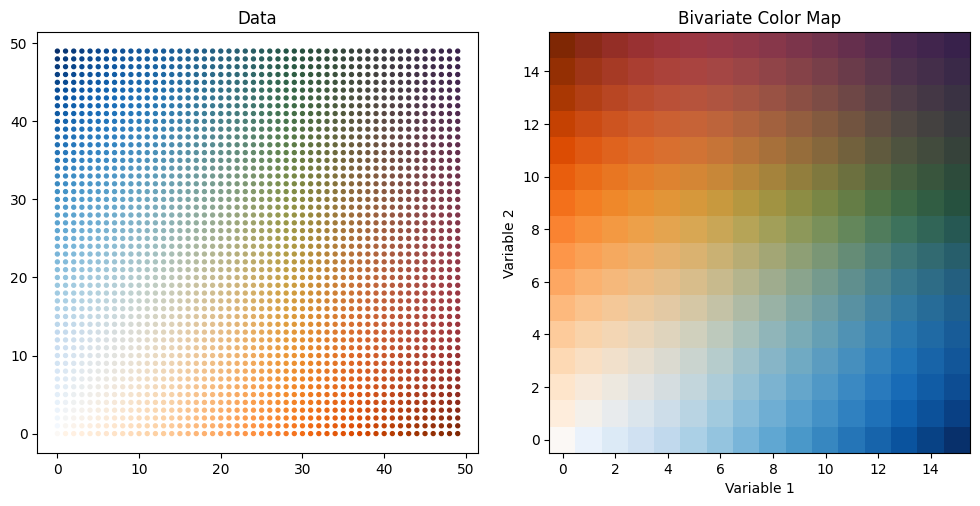

In [4]:
from matplotlib import pyplot as plt
import numpy as np
from bivario.cmap import cmap_from_bivariate_data

xx, yy = np.mgrid[0:50, 0:50]
C_map = cmap_from_bivariate_data(xx, yy, cmap1=plt.cm.Oranges, cmap2=plt.cm.Blues)

fig = plt.figure(figsize=(10, 5))

ax1 = fig.add_subplot(1, 2, 1)
x = xx.flatten()
y = yy.flatten()
cflat = C_map.reshape((len(x), 4))
plt.scatter(x, y, c=cflat, s=8)

ax1.set_title("Data")

xx, yy = np.mgrid[0:16, 0:16]
C_map = cmap_from_bivariate_data(xx, yy, cmap1=plt.cm.Oranges, cmap2=plt.cm.Blues)

ax2 = fig.add_subplot(1, 2, 2)
ax2.imshow(C_map)
ax2.set_title("Bivariate Color Map")
ax2.set_xlabel("Variable 1")
ax2.set_ylabel("Variable 2")
ax2.set_ylim((-0.5, 0.5 + (yy.max() - yy.min())))

fig.tight_layout()
fig.show()

In [94]:
from mapclassify import classify

binning_start = classify(df["morning_starts"], scheme="NaturalBreaks", k=7)
binning_end = classify(df["morning_ends"], scheme="NaturalBreaks", k=7)
binning_end

NaturalBreaks

     Interval        Count
--------------------------
[   0.00,  153.00] |   931
( 153.00,  404.00] |   251
( 404.00,  729.00] |   125
( 729.00, 1166.00] |    84
(1166.00, 1758.00] |    57
(1758.00, 2554.00] |    31
(2554.00, 3689.00] |    22

In [95]:
binning_start.bins

array([ 168.,  454.,  832., 1279., 1875., 2769., 4740.])

In [96]:
C_map = cmap_from_bivariate_data(binning_start.yb, binning_end.yb, cmap1=plt.cm.Oranges, cmap2=plt.cm.Blues)
C_map

array([[0.98431373, 0.97254902, 0.96078431, 1.        ],
       [0.98431373, 0.97254902, 0.96078431, 1.        ],
       [0.98431373, 0.97254902, 0.96078431, 1.        ],
       ...,
       [0.98431373, 0.97254902, 0.96078431, 1.        ],
       [0.98431373, 0.97254902, 0.96078431, 1.        ],
       [0.98431373, 0.97254902, 0.96078431, 1.        ]], shape=(1501, 4))

/tmp/ipykernel_4868/3793681911.py:108: UserWarning: The figure layout has changed to tight
  fig.tight_layout()


Initial data area size: 113.7×113.2px
[2. 2.]
[3.53272698 3.53272698]
Bbox(x0=0.27108723958333336, y0=0.2912457061648833, x1=0.8394335937499999, y1=0.8573805959184501)
TransformedBbox(
    Bbox(x0=0.27108723958333336, y0=0.2912457061648833, x1=0.8394335937499999, y1=0.8573805959184501),
    BboxTransformTo(
        TransformedBbox(
            Bbox(x0=0.0, y0=0.0, x1=3.5327269811450437, y1=3.5327269811450437),
            Affine2D().scale(100.0))))
95.76772055201724 102.88915643113246 200.78125 200.0
Changed data area size: 200.8×200.0px
-45.76772055201724 22.889156431132463



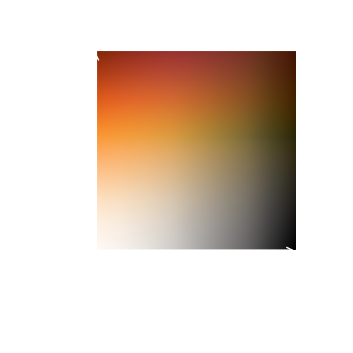

In [97]:
import base64
from PIL import Image
from folium.plugins import FloatImage
from matplotlib.colors import rgb2hex

cmap1 = plt.cm.Oranges
# cmap2 = plt.cm.Blues

# cmap1 = plt.cm.rainbow
cmap2 = plt.cm.Greys

cmap = cmap_from_bivariate_data(binning_start.yb, binning_end.yb, cmap1=cmap1, cmap2=cmap2)
hex_values = [rgb2hex(cmap[i, :]) for i in range(cmap.shape[0])]

color_dict = dict(zip(df.index, hex_values))

default_grid_size = 5
current_grid_size = 256
# current_grid_size = 5
xx, yy = np.mgrid[0:current_grid_size, 0:current_grid_size]
legend_cmap = cmap_from_bivariate_data(xx, yy, cmap1=cmap1, cmap2=cmap2)

img = Image.fromarray(np.uint8((legend_cmap)[:, :, :3] * 255))

# img = img.transpose(Image.FLIP_TOP_BOTTOM)  # .resize((100, 100), resample=0)

# params = {"ytick.color" : "w",
#           "xtick.color" : "w",
#           "axes.labelcolor" : "w",
#           "axes.edgecolor" : "w"}

IMAGE_SIZE_PX = 200
DPI = 100

TICK_FONTSIZE_PX = 10
TICK_FONTSIZE_PT = TICK_FONTSIZE_PX * 72 / DPI

IMG_SIZE_IN = IMAGE_SIZE_PX / DPI


def figure_to_base64_string(plt_fig):
    import io

    buffered = io.BytesIO()
    # img.save(buffered, format="PNG")
    # plt_fig.tight_layout()
    plt_fig.savefig(buffered, transparent=True, dpi=DPI)
    # plt_fig.savefig(buffered, dpi=DPI)
    return base64.b64encode(buffered.getvalue()).decode("utf-8")


color = "white"

with plt.rc_context(
    {
        "axes.labelcolor": color,
        "axes.edgecolor": color,
        "xtick.color": color,
        "ytick.color": color,
    }
):
    fig, ax = plt.subplots(figsize=(IMG_SIZE_IN, IMG_SIZE_IN), dpi=DPI, constrained_layout=True)
    ax.imshow(img, origin="lower")
    ax.tick_params(axis="both", which="both", length=0)
    # ax.axis("off")

    # fig.tight_layout()

    ax.annotate(
        "",
        xy=(0, 1),
        xytext=(0, 0),
        arrowprops=dict(
            arrowstyle="->",
            lw=1,
            color=color,
        ),
        xycoords="axes fraction",
    )
    ax.annotate(
        "",
        xy=(1, 0),
        xytext=(0, 0),
        arrowprops=dict(
            arrowstyle="->",
            lw=1,
            color=color,
        ),
        xycoords="axes fraction",
    )

    ax.set_ylabel("Column B", fontsize=TICK_FONTSIZE_PT)
    ax.set_xlabel("Column A", fontsize=TICK_FONTSIZE_PT)
    ax.tick_params(labelsize=TICK_FONTSIZE_PT)

    labels = [0, *binning_start.bins]

    # numerical
    xticks = np.linspace(-0.5, legend_cmap.shape[1] + 0.5, len(labels))
    # xticks = np.arange(-0.5, cmap.shape[1], 1)
    # categorical
    # xticks = np.arange(0, cmap.shape[1], 1)
    ax.set_xticks(xticks)

    # ax.set_xticklabels(labels[:len(xticks)], ha="right")
    ax.set_xticklabels(labels)

    fig.tight_layout()

    fig.canvas.draw()
    renderer = fig.canvas.get_renderer()

    # Get bounding boxes (in display / pixel coordinates)
    bbox_ax = ax.get_window_extent(renderer)  # The axes area (data + ticks + labels)
    bbox_data = ax.get_position()  # Normalized position in figure

    # Compute inner data area size (in pixels)
    data_width_px = bbox_ax.width
    data_height_px = bbox_ax.height

    print(f"Initial data area size: {data_width_px:.1f}×{data_height_px:.1f}px")

    # Calculate scale factor so data area = target_data_px
    scale = IMAGE_SIZE_PX / min(data_width_px, data_height_px)

    print(fig.get_size_inches())

    # Compute new figure size (inches)
    w_in, h_in = fig.get_size_inches()
    new_w_in = w_in * scale
    new_h_in = h_in * scale

    fig.set_size_inches(new_w_in, new_h_in)

    print(fig.get_size_inches())

    # Redraw with new size
    fig.canvas.draw()

    renderer = fig.canvas.get_renderer()

    # Get bounding boxes (in display / pixel coordinates)
    bbox_ax = ax.get_window_extent(renderer)  # The axes area (data + ticks + labels)
    bbox_data = ax.get_position()
    print(bbox_data)  # Normalized position in figure
    print(bbox_ax)
    x0, y0, w, h = bbox_ax.bounds
    print(x0, y0, w, h)  # Normalized position in figure

    # Compute inner data area size (in pixels)
    data_width_px = bbox_ax.width
    data_height_px = bbox_ax.height

    print(f"Changed data area size: {data_width_px:.1f}×{data_height_px:.1f}px")

    data_url = "data:image/png;base64," + figure_to_base64_string(fig)

    plt.close()


# fig.savefig('temp.png', transparent=True)

m = df.reset_index().explore(
    # "index", cmap=lambda x: color_dict[x], legend=False, tiles="CartoDB Positron"
    "index",
    cmap=lambda x: color_dict[x],
    legend=False,
    tiles="CartoDB DarkMatter",
)

# print(data_url)

legend_position_x = 50
legend_position_y = 80

new_fig_size_px = new_w_in * DPI
translateX = legend_position_x - x0
translateY = -(new_fig_size_px - y0 - 200)
translateY = +y0 - legend_position_y
print(translateX, translateY)

FloatImage(
    data_url,
    bottom=0,
    left=0,
    width=f"{new_fig_size_px}px",
    transform=f"translate({translateX}px, {translateY}px)",
).add_to(m)

# plt.close()
# plt.show()
m

In [59]:
m.save("bivariate_legend_map.html")

In [9]:
from matplotlib.colors import rgb2hex


cmap = cmap_from_bivariate_data(
    binning_start.yb,
    binning_end.yb,
    cmap1=plt.cm.Oranges,
    cmap2=plt.cm.Blues,
)
hex_values = [rgb2hex(cmap[i, :]) for i in range(cmap.shape[0])]

color_dict = dict(zip(df.index, hex_values))

m = df.reset_index().explore(
    "index", cmap=lambda x: color_dict[x], legend=False, tiles="CartoDB Positron"
)
m